In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pickle as pk

In [2]:
data = pd.read_csv('loan_approval_dataset.csv')
print("Initial Dataset:")
display(data.head())

Initial Dataset:


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
data.columns = data.columns.str.strip()

# Remove loan_id (not useful for prediction)
if 'loan_id' in data.columns:
    data.drop(columns=['loan_id'], inplace=True)

print("Columns:", data.columns.tolist())

Columns: ['no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'loan_status']


In [4]:
data['assets'] = (
    data['residential_assets_value'] +
    data['commercial_assets_value'] +
    data['luxury_assets_value'] +
    data['bank_asset_value']
)

In [5]:
data.drop(columns=[
    'residential_assets_value',
    'commercial_assets_value',
    'luxury_assets_value',
    'bank_asset_value'
], inplace=True)

print("After Asset Engineering:")
display(data.head())


After Asset Engineering:


,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,assets
0,2,Graduate,No,9600000,29900000,12,778,Approved,50700000
1,0,Not Graduate,Yes,4100000,12200000,8,417,Rejected,17000000
2,3,Graduate,No,9100000,29700000,20,506,Rejected,57700000
3,3,Graduate,No,8200000,30700000,8,467,Rejected,52700000
4,5,Not Graduate,Yes,9800000,24200000,20,382,Rejected,55000000


In [6]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
no_of_dependents    0
education           0
self_employed       0
income_annum        0
loan_amount         0
loan_term           0
cibil_score         0
loan_status         0
assets              0
dtype: int64


In [7]:
def clean_data(st):
    return st.strip() if isinstance(st, str) else st

data['education'] = data['education'].apply(clean_data)
data['self_employed'] = data['self_employed'].apply(clean_data)
data['loan_status'] = data['loan_status'].apply(clean_data)


In [8]:
# Education: Graduate=1, Not Graduate=0
data['education'] = data['education'].replace(['Graduate', 'Not Graduate'], [1, 0])

# Self-employed: Yes=1, No=0
data['self_employed'] = data['self_employed'].replace(['Yes', 'No'], [1, 0])

# Loan Status: Approved=1, Rejected=0
data['loan_status'] = data['loan_status'].replace(['Approved', 'Rejected'], [1, 0])

print("\nAfter Encoding:")
display(data.head())


After Encoding:


C:\Users\91789\AppData\Local\Temp\ipykernel_26236\3010399331.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['education'] = data['education'].replace(['Graduate', 'Not Graduate'], [1, 0])
C:\Users\91789\AppData\Local\Temp\ipykernel_26236\3010399331.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['self_employed'] = data['self_employed'].replace(['Yes', 'No'], [1, 0])
C:\Users\91789\AppData\Local\Temp\ipykernel_26236\3010399331.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,assets
0,2,1,0,9600000,29900000,12,778,1,50700000
1,0,0,1,4100000,12200000,8,417,0,17000000
2,3,1,0,9100000,29700000,20,506,0,57700000
3,3,1,0,8200000,30700000,8,467,0,52700000
4,5,0,1,9800000,24200000,20,382,0,55000000


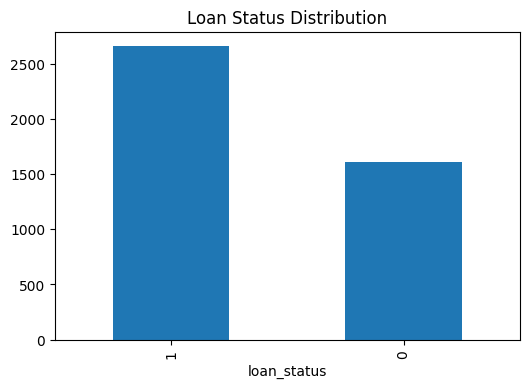

In [9]:
plt.figure(figsize=(6,4))
data['loan_status'].value_counts().plot(kind='bar', title="Loan Status Distribution")
plt.show()


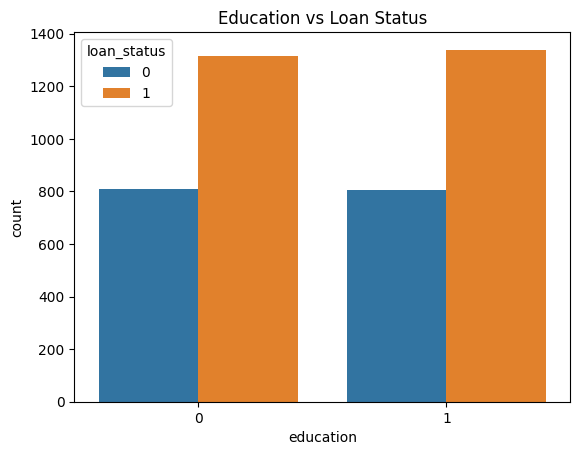

In [10]:
sns.countplot(data=data, x='education', hue='loan_status')
plt.title("Education vs Loan Status")
plt.show()

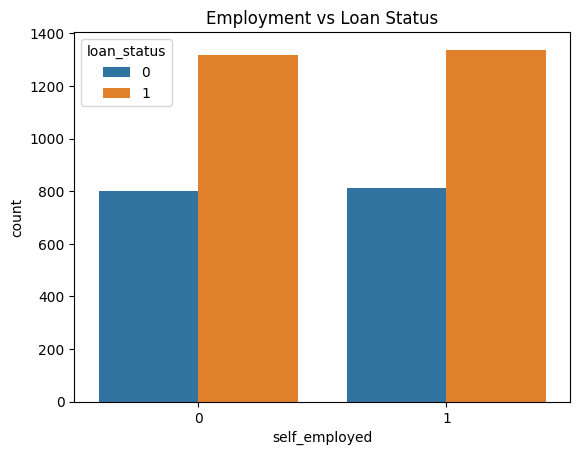

In [11]:
sns.countplot(data=data, x='self_employed', hue='loan_status')
plt.title("Employment vs Loan Status")
plt.show()

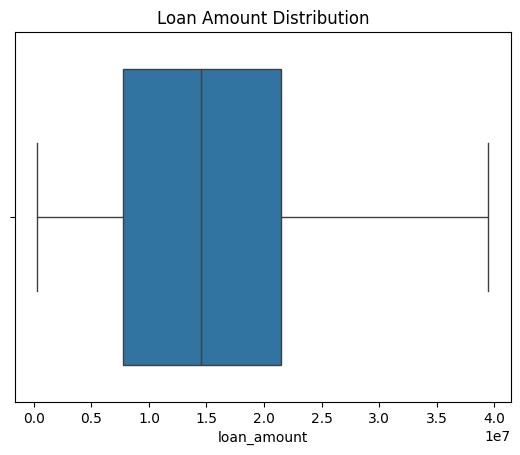

In [12]:
sns.boxplot(x=data['loan_amount'])
plt.title("Loan Amount Distribution")
plt.show()

In [13]:
X = data.drop(columns=['loan_status'])
y = data['loan_status']

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train Shape:", x_train.shape)

Train Shape: (3415, 8)


In [14]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [15]:
model = LogisticRegression(max_iter=200)
model.fit(x_train_scaled, y_train)

accuracy = model.score(x_test_scaled, y_test)
print("\nModel Accuracy:", accuracy)



Model Accuracy: 0.905152224824356


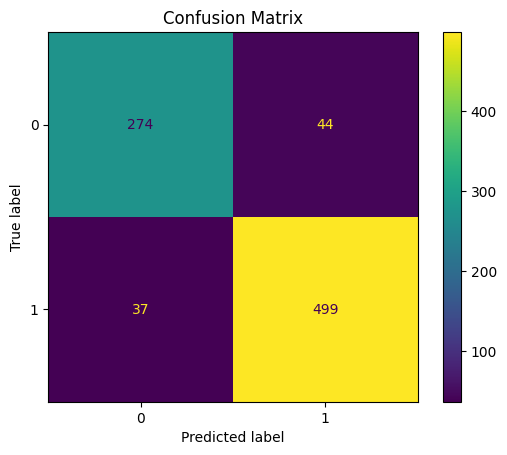

In [16]:
y_pred = model.predict(x_test_scaled)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

In [17]:
predict_data = pd.DataFrame([[
    2, 1, 0, 9600000, 29900000, 12, 778, 50700000
]], columns=[
    'no_of_dependents','education','self_employed','income_annum',
    'loan_amount','loan_term','cibil_score','assets'
])

predict_scaled = scaler.transform(predict_data)
print("\nSample Prediction:", model.predict(predict_scaled))


Sample Prediction: [1]


In [18]:
pk.dump(model, open('model.pkl', 'wb'))
pk.dump(scaler, open('scaler.pkl', 'wb'))

print("\nModel and scaler saved successfully!")


Model and scaler saved successfully!
